# Import de libs

Importando libs que vamos usar:
- SKLearn (datasets)
- Pandas (ferramenta para manipular os dados)
- Seaborn (criar gráficos)

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns

# Pegando o dataset diamonds

- Mostrando um pouco do dataset
- Mostrando o que cada variável é

In [2]:
sns_dataset = sns.load_dataset('diamonds')

In [3]:
sns_dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# dataset collumn description

sns_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


# Colunas do Dataset `diamonds` (Seaborn)

1. **carat**: Peso do diamante (quilates).
2. **cut**: Qualidade do corte (`Fair`, `Good`, `Very Good`, `Premium`, `Ideal`).
3. **color**: Cor do diamante (escala D a J, onde D é o mais incolor).
4. **clarity**: Clareza do diamante (de I1 a IF, indica imperfeições).
5. **depth**: Profundidade do diamante (% do diâmetro médio).
6. **table**: Largura da parte superior (% da largura total).
7. **price**: Preço do diamante (em dólares).
8. **x**: Largura do diamante (milímetros).
9. **y**: Comprimento do diamante (milímetros).
10. **z**: Profundidade do diamante (milímetros).


In [14]:
# cria um df cópia, onde o cut é numero
df = sns_dataset.copy()
df['cut'] = df['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})

# retira o clarity e o color
df = df.drop(['clarity', 'color'], axis=1)
df.head()

,carat,cut,depth,table,price,x,y,z
0,0.23,5,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

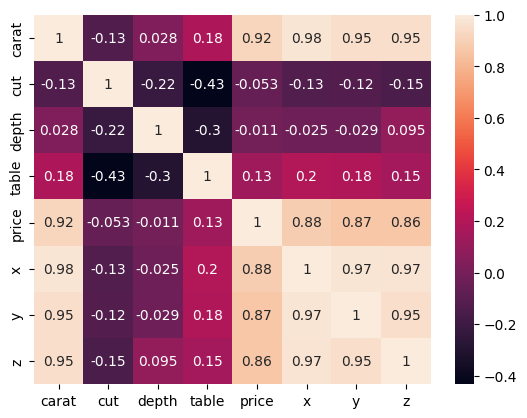

In [15]:
sns.heatmap(df.corr(), annot=True)

# Explorando o dataset:

## Será que o corte e o quilate tem muita relação? O que podemos tirar disso?

Pela correlação de pearson acima, e pelo gráfico abaixo, vemos que não tem influência.

Independente do quilate, temos eles com cortes diferentes.

Mas conseguimos ver que a maior parte dos diamantes estão até 2 quilates, e temos alguns casos que chegam acima de 4 quilates, mas o corte difícilmente fica ideal quando o diamante é grande COM BASE NESSE DATASET.

<Axes: xlabel='carat', ylabel='cut'>

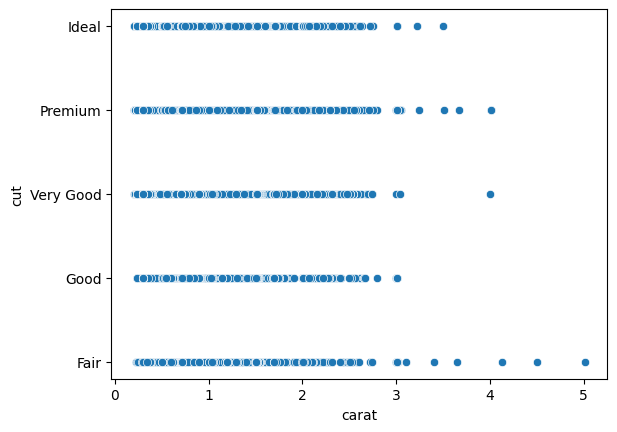

In [7]:
# gráfico de dispersão
sns.scatterplot(data=sns_dataset, x='carat', y='cut')

### Será que o carat tem relação com o preço?

- Com base na correlação de pearson 0.92 sim, e é forte.
- Faz sentido, quanto mais pesado, mais caro.
  - vemos diamantes de até 1carat valer menos que 10K

<Axes: xlabel='carat', ylabel='price'>

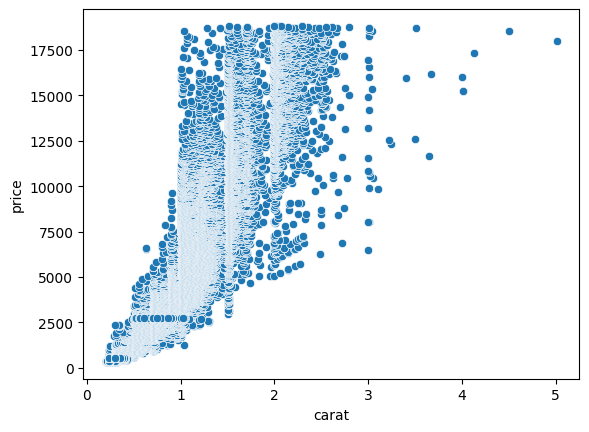

In [16]:
sns.scatterplot(data=sns_dataset, x='carat', y='price')

Talvez nem teha o melhor corte, mas seja pesado o suficiente para ser o mais caro.

E talvez tenha o corte ótimo, mas não tão pesado, mas mesmo assim é o mais caro

<Axes: xlabel='carat', ylabel='price'>

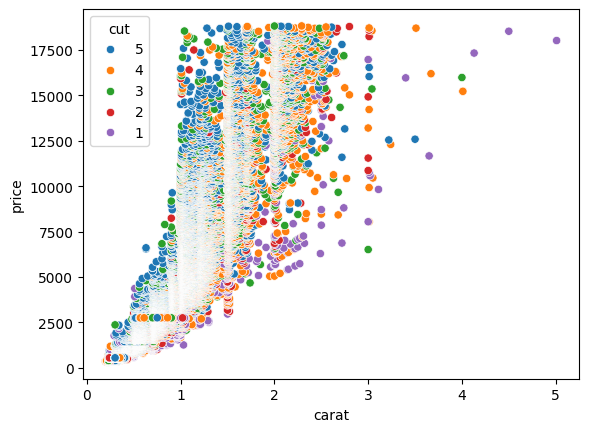

In [17]:
sns.scatterplot(data=df, x='carat', y='price', hue='cut')

# O VOLUME DO DIAMANTE está ligado com o peso? E com o preço?

In [19]:
# criando um dataset cópia apenas com carat, volume e price

df_volume = sns_dataset.copy()
df_volume['volume'] = df_volume['x'] * df_volume['y'] * df_volume['z']
df_volume = df_volume[['carat', 'volume', 'price']]
df_volume.head()

,carat,volume,price
0,0.23,38.202030,326
1,0.21,34.505856,326
2,0.23,38.076885,327
3,0.29,46.724580,334
4,0.31,51.917250,335


In [20]:
# calc corr

df_volume.corr()

,carat,volume,price
carat,1.000000,0.976308,0.921591
volume,0.976308,1.000000,0.902385
price,0.921591,0.902385,1.000000


<Axes: xlabel='carat', ylabel='volume'>

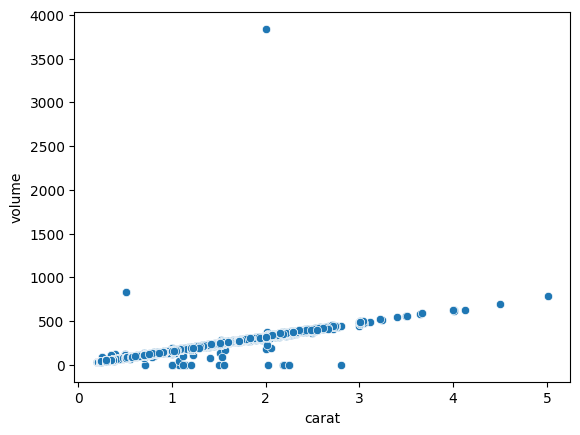

In [21]:
sns.scatterplot(data=df_volume, x='carat', y='volume')
# o outlier...digitou errado?
# ele teria 4 cm +-

<Axes: xlabel='volume', ylabel='price'>

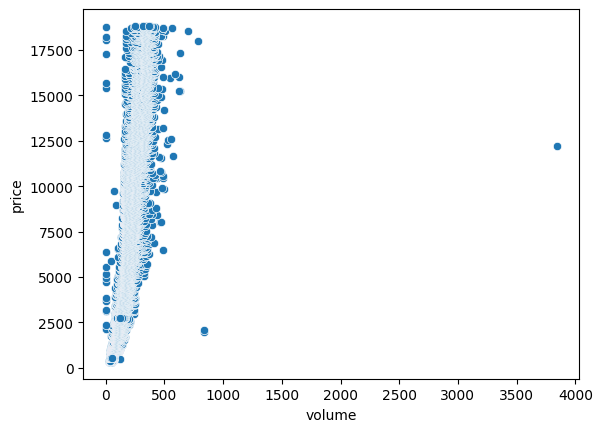

In [23]:
sns.scatterplot(data=df_volume, x='volume', y='price')